In [1]:
#Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for ploting things
import seaborn as sns #more plots
import sklearn
from datetime import datetime, date
from plotly.offline import iplot
from sklearn.impute import SimpleImputer

In [2]:
Training = pd.read_csv("Validation.csv", low_memory = False)

In [3]:
Training[Training.columns[Training.isna().any()]]

,db_annualsales,db_city,db_companyname,db_country,db_state,db_employeerange,db_accountwatch,db_audience,db_subindustry,highest_prodA_edition,...,channel_support_total,new_segment,hyperthreading_active_flag,hv_replay_capable_flag,ftr_first_date_hol_page_view,ftr_first_date_eval_page_view,ftr_first_date_seminar_page_view,ftr_first_date_webinar_page_view,ftr_first_date_whitepaper_download,ftr_first_date_any_download
0,NaN,San Vicente Del Raspeig,NaN,ES,60,NaN,NaN,Residential,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Columbus,NaN,US,OH,NaN,NaN,Residential,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,UA,NaN,NaN,NaN,Residential,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Taipei,TAICHUNG COUNTY LUH-LIOU JUNIOR HIGH SCHOOL,TW,04,NaN,NaN,SOHO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Brisbane,NaN,AU,04,NaN,NaN,Residential,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50001,NaN,NaN,OOO Direct Telecom,RU,NaN,NaN,NaN,SOHO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50002,NaN,Uttar Pradesh,Indian Institute of Technology Roorkee,IN,UP,NaN,NaN,Education->University,University,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50003,7.900000e+04,Pompton Lakes,VELCOM 3G subscibers,US,RP,Very Small,NaN,Wireless->Mobile Network,Software Applications,2.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50004,4.714200e+10,Honolulu,Cisco Systems Inc,US,HI,Enterprise,NaN,Enterprise Business->Telecommunications,Equipment & Services,7.0,...,0.000000,Medium SMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#There are columns that have NA only in the values (100% missing). Therefore, those columns are not useful for modelling. 
#Dropping those columns
Training = Training.drop(['gu_ind_vmw_major_lookup','gu_ind_vmw_sub_category'],axis=1)

In [5]:
#Drop the cols that have high percentage missing (70% above data are missing)

Training = Training.drop(['highest_prodA_edition','total_prodD_booking_amount','total_prodG_booking_amount',
                          'total_prodT_license_booking_amount','total_prodH_booking_amount','total_prodJ_booking_amount',
                          'total_prodT_booking_amount','total_prodN_booking_amount','total_prodO_booking_amount',
                          'total_prodC_booking_amount','total_prodF_booking_amount','total_prodA_ent_plus_booking_amount',
                          'total_prodB_booking_amount','total_prodA_ent_booking_amount','total_prodA_booking_amount',
                          'total_prodA_std_booking_amount','total_prodA_5_x_booking_amount','total_prodN_license_booking_amount'],axis=1)

In [6]:
#Drop the one with date. 
#We already have dummy variables column that indicate 0/1 for viewing or not.
Training = Training.drop(['ftr_first_date_webinar_page_view','ftr_first_date_eval_page_view','ftr_first_date_seminar_page_view',
                          'ftr_first_date_whitepaper_download','ftr_first_date_any_download','ftr_first_date_hol_page_view'],axis=1)

In [7]:
#channel_direct_total, channel_partner_total, channel_web_total, channel_oem_total, channel_support_total
#We have a channel_total column and total_pct columns. When above columns are NA, the total_pct = 0 (i.e. channel_direct_total = NA,
# channel_direct_total_pct = 0. Same for other columns). Therefore, we are changing those NA values to 0 

cols = ['channel_direct_total','channel_partner_total','channel_web_total','channel_oem_total','channel_support_total']
Training[cols] = Training[cols].fillna(value=0)

In [8]:
#Categorial columns that have NA: change the NA to Unknown
cols = ['db_city','db_companyname','db_country','db_state','db_employeerange','db_accountwatch','db_audience','db_subindustry',
        'iso_country_dunssite','region_dunssite','sic_2_description','sic_4_description','gu_city','gu_state','gu_iso_country_name',
        'gu_country_region','gu_country_geo','gu_annual_sales_usd','gu_num_of_employees','final_vertical_gu','gu_sic_2_description', 
        'gu_sic_4_description','final_vertical_dunssite','hv_replay_capable_flag','new_segment','gu_emp_segment','geo_dunssite',
        'hyperthreading_active_flag']
Training[cols] = Training[cols].fillna('Unknown')

In [9]:
#Account watch has value called null:null:null:null, which doesn't represent anything. Therefore, we replace it with Unknown as well
Training['db_accountwatch'].replace('null:null:null:null','Unknown')

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
50001    Unknown
50002    Unknown
50003    Unknown
50004    Unknown
50005    Unknown
Name: db_accountwatch, Length: 50006, dtype: object

In [10]:
#Drop the categorial variables
Training = Training.drop(['db_industry', 'db_city','db_companyname', 'db_country', 'db_state', 'db_employeerange', 'db_accountwatch', 
                          'db_audience','db_subindustry', 'iso_country_dunssite', 'region_dunssite', 'geo_dunssite', 
                          'sic_2_description', 'sic_4_description', 'gu_city','gu_state', 'gu_iso_country_name', 'gu_country_region', 
                          'gu_country_geo', 'gu_annual_sales_usd', 'gu_num_of_employees','final_vertical_gu',  'gu_sic_2_description', 
                          'gu_sic_4_description', 'gu_emp_segment', 'gu_emp_segment_desc', 'final_vertical_dunssite', 'idc_verticals', 
                          'new_segment'],axis=1)

In [11]:
#Create dummy for 'hyperthreading_active_flag', 'hv_replay_capable_flag'
Training = pd.get_dummies(data=Training, columns=['hyperthreading_active_flag', 'hv_replay_capable_flag'])

In [12]:
#db_annualsales is missing around 64% (32K/50K). We are using mean-impute to calculate teh missing value. New column 
#(db_annualsales_impute) indicates whether the value is imputed or not (1 = imputed; 0 = not imputed)
Training['db_annualsales_impute'] = Training['db_annualsales'].apply(lambda x: 0 if pd.isna(x) else 1)
#Training['db_annualsales_impute']

In [13]:
#Per FQA, impute annualsales with mean 
Training['db_annualsales'].fillna((Training['db_annualsales'].mean()), inplace=True)

In [14]:
#Double check if there's any other missing value. 
Training[Training.columns[Training.isna().any()]]

""
0
1
2
3
4
...
50001
50002
50003
50004


In [15]:
#Find the columns that have same values for every single row. Drop those as those columns might not be helpful for the model
list_duplicate_col = []
for i in Training:
    if (Training[i] == Training[i][0]).all():
        list_duplicate_col.append(i)

#Uncomment list_duplicate_col to see all the columns that have same value        
#list_duplicate_col
Training = Training.drop(list_duplicate_col, axis=1)

In [16]:
#Per FAQ A1, we don't know what the other numbers represent. We can treat the non zero one as 1 to the target value.
#check_more_num = list(Training.columns[Training.isin([2]).any()] )
#check_more_num
#Training[Training.target != 0] = 1

In [17]:
#tot_page_views_l30d, tot_page_views_l90d drop cuz we have tot_page_views. And those are highly correlated (Over 90%)
#Same for tot_visits_l30d and tot_visits_l90d. Dropping those as we have tot_visits

#Uncomment following if you want to remove the ones that are highly-correlated.
#Training = Training.drop(['tot_page_views_l30d','tot_page_views_l90d','tot_visits_l30d', 'tot_visits_l90d'],axis=1)

In [18]:
checktype = list(Training.select_dtypes(include=['object']).columns)
checktype
#['db_industry', 'db_city','db_companyname', 'db_country', 'db_state', 'db_employeerange', 'db_accountwatch', 'db_audience',
# 'db_subindustry', 'iso_country_dunssite', 'region_dunssite', 'geo_dunssite', 'sic_2_description', 'sic_4_description', 'gu_city',
# 'gu_state', 'gu_iso_country_name', 'gu_country_region', 'gu_country_geo', 'gu_annual_sales_usd', 'gu_num_of_employees',
# 'final_vertical_gu',  'gu_sic_2_description', 'gu_sic_4_description', 'gu_emp_segment', 'gu_emp_segment_desc',
# 'final_vertical_dunssite', 'idc_verticals', 'new_segment', 'hyperthreading_active_flag', 'hv_replay_capable_flag']

[]

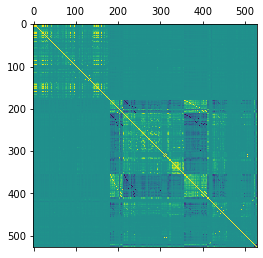

In [19]:
plt.matshow(Training.corr())
plt.show()

In [20]:
Training

,Unnamed: 0,tot_page_views,tot_page_views_l30d,tot_page_views_l90d,tot_visits,tot_visits_l30d,tot_visits_l90d,log_in_events,internal_search_events,internal_campaign_events,...,tgt_first_date_any_download,tgt_more_than1,target,hyperthreading_active_flag_N,hyperthreading_active_flag_Unknown,hyperthreading_active_flag_Y,hv_replay_capable_flag_N,hv_replay_capable_flag_Unknown,hv_replay_capable_flag_Y,db_annualsales_impute
0,2,152,0,0,15,0,0,148,0,0,...,0,0,0,0,1,0,0,1,0,0
1,4,35,0,0,7,0,0,31,0,0,...,0,0,0,0,1,0,0,1,0,0
2,5,50,0,50,2,0,2,50,7,0,...,0,0,0,0,1,0,0,1,0,0
3,7,75,6,19,11,1,4,75,0,0,...,0,0,0,0,1,0,0,1,0,0
4,10,5,0,5,1,0,1,5,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50001,199985,40,0,0,7,0,0,40,0,0,...,0,0,0,0,1,0,0,1,0,0
50002,199987,5,0,0,1,0,0,4,0,0,...,0,0,0,0,1,0,0,1,0,0
50003,199992,221,16,97,44,8,17,213,3,0,...,0,0,0,0,1,0,0,1,0,1
50004,199995,93,71,71,12,8,8,92,0,0,...,0,0,0,0,1,0,0,1,0,1


In [21]:
corr_mat = Training.corr()
#print(corr_mat)
#corr_mat.to_csv('corr_mat2.csv',index=False)

In [22]:
#Check skewness
dic_skew = dict(Training.skew(axis='index',numeric_only=True))
#dic_skew
skew_greater_than_100 = dict((k, v) for k, v in dic_skew.items() if v >= 100)
skew_greater_than_100

#Negative skewness is all small 
#Should we apply filter on following columns?

{'tot_page_views': 142.14337442214102,
 'tot_page_views_l30d': 141.12845947046338,
 'tot_page_views_l90d': 136.17408224092208,
 'tot_visits': 172.60408959841402,
 'tot_visits_l30d': 174.9942711990464,
 'tot_visits_l90d': 164.39286821286956,
 'log_in_events': 104.27543692168568,
 'internal_search_events': 189.56406459402032,
 'product_view_events': 144.18065274515425,
 'cart_view_events': 201.51580254634655,
 'checkout_s1_events': 142.17524848259686,
 'purchase_events': 138.02184716340585,
 'survey_display_events': 158.11862616404682,
 'survey_submit_events': 158.11862616404684,
 'natural_search_events': 134.10817429095914,
 'video_view_events': 216.76953128294588,
 'file_download_events': 203.36811510224956,
 'tot_mozilla_browser_page_views': 110.137818296046,
 'tot_microsoft_browser_page_views': 146.86034194063552,
 'tot_internal_ref_page_views': 115.32630651497354,
 'tot_search_engine_ref_page_views': 133.10368230630178,
 'tot_other_ref_page_views': 135.8216036894231,
 'tot_android_p

In [23]:
#Drop the one that have outliers
Trainfilt = Training[Training['internal_search_events'] >= 301].index
Trainfilt2 = Training[Training['cart_remove_events'] > 50].index
Trainfilt3 = Training[Training['tot_aol_se_page_views'] > 90].index
Trainfilt4 = Training[Training['paid_social_views'] > 30].index

In [24]:
Training.drop(Trainfilt, inplace=True)
Training.drop(Trainfilt2, inplace=True)
Training.drop(Trainfilt3, inplace=True)
Training.drop(Trainfilt4, inplace=True)

In [25]:
Training

,Unnamed: 0,tot_page_views,tot_page_views_l30d,tot_page_views_l90d,tot_visits,tot_visits_l30d,tot_visits_l90d,log_in_events,internal_search_events,internal_campaign_events,...,tgt_first_date_any_download,tgt_more_than1,target,hyperthreading_active_flag_N,hyperthreading_active_flag_Unknown,hyperthreading_active_flag_Y,hv_replay_capable_flag_N,hv_replay_capable_flag_Unknown,hv_replay_capable_flag_Y,db_annualsales_impute
0,2,152,0,0,15,0,0,148,0,0,...,0,0,0,0,1,0,0,1,0,0
1,4,35,0,0,7,0,0,31,0,0,...,0,0,0,0,1,0,0,1,0,0
2,5,50,0,50,2,0,2,50,7,0,...,0,0,0,0,1,0,0,1,0,0
3,7,75,6,19,11,1,4,75,0,0,...,0,0,0,0,1,0,0,1,0,0
4,10,5,0,5,1,0,1,5,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50001,199985,40,0,0,7,0,0,40,0,0,...,0,0,0,0,1,0,0,1,0,0
50002,199987,5,0,0,1,0,0,4,0,0,...,0,0,0,0,1,0,0,1,0,0
50003,199992,221,16,97,44,8,17,213,3,0,...,0,0,0,0,1,0,0,1,0,1
50004,199995,93,71,71,12,8,8,92,0,0,...,0,0,0,0,1,0,0,1,0,1


In [26]:
print(Training.filter(like='prodA').columns)
#keep all the total, and drop everything else for prodA
#prodA_5_x_2013_bookings_amount, prodA_5_x_2014_bookings_amount, prodA_5_x_2015_bookings_amount -> keep total_prodA_booking_amount

Index(['num_prodA_editions_distinct', 'days_bw_prodA_launch_and_purch',
       'days_bw_prodA_5_x_launch_and_purch', 'prodA_qty',
       'days_bw_prodA_std_launch_and_purch',
       'days_bw_prodA_ent_launch_and_purch',
       'days_bw_prodA_ent_plus_launch_and_purch', 'flag_prodA_customer',
       'flag_prodA_5_x_customer', 'flag_prodA_5_x_mdm',
       'flag_prodA_std_customer', 'flag_prodA_ent_customer',
       'flag_prodA_ent_plus_customer', 'prodA_std_2013_bookings_amount',
       'prodA_std_2014_bookings_amount', 'prodA_std_2015_bookings_amount',
       'prodA_ent_2013_bookings_amount', 'prodA_ent_2014_bookings_amount',
       'prodA_ent_2015_bookings_amount', 'prodA_ent_plus_2013_bookings_amount',
       'prodA_ent_plus_2014_bookings_amount',
       'prodA_ent_plus_2015_bookings_amount', 'prodA_2013_bookings_amount',
       'prodA_2014_bookings_amount', 'prodA_2015_bookings_amount',
       'prodA_5_x_2013_bookings_amount', 'prodA_5_x_2014_bookings_amount',
       'prodA_5_x_2015_

In [27]:
Validation = Training

# Export Training file

In [28]:
Validation.to_csv('validation_clean.csv',index=False)

# Import Training file

In [29]:
Training = pd.read_csv("training_v2.csv", low_memory = False)

In [30]:
Validation = pd.read_csv("validation_clean.csv", low_memory = False)

In [31]:
#Validation = pd.read_csv("Validation.csv", low_memory = False)

In [32]:
# Separate out X features and Y target 

In [33]:
x_Valid = Validation.drop(['tgt_first_date_hol_page_view'
                          ,'tgt_first_date_eval_page_view'
                          ,'tgt_first_date_webinar_page_view'
                          ,'tgt_first_date_whitepaper_download'
                          ,'tgt_first_date_any_download'
                          ,'tgt_more_than1'
                          ,'target']
                          ,axis=1)
y_Valid = Validation['target']

In [34]:
x_Train = Training.drop(['tgt_first_date_hol_page_view'
                          ,'tgt_first_date_eval_page_view'
                          ,'tgt_first_date_webinar_page_view'
                          ,'tgt_first_date_whitepaper_download'
                          ,'tgt_first_date_any_download'
                          ,'tgt_more_than1'
                          ,'target']
                          ,axis=1)
y_Train = Training['target']

In [35]:
# Calling Random Forest from SKlearn Ensemble library

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Import Classification report and confusion matrix

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
rfc = RandomForestClassifier(n_estimators=200)

In [40]:
rfc.fit(x_Train, y_Train)

RandomForestClassifier(n_estimators=200)

In [41]:
rfc_pred = rfc.predict(x_Valid)

/Users/danfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- days_bw_prodS_launch_and_purch
- days_since_first_prodS_purchase_date
- days_since_last_prodS_purchase_date
- ftr_dummy_highest_prodA_edition0
- tot_prod9_blog_page_views
Feature names seen at fit time, yet now missing:
- affliate_views
- find_retailer_events
- prodN_license_2013_bookings_amount
- tot_prod11_webinar_page_views
- tot_prod5_webinar_page_views




In [42]:
print('\n')
print(confusion_matrix(y_Valid, rfc_pred))
print('\n')
print(classification_report(y_Valid, rfc_pred))



[[ 4641 43958     0     0     0     0]
 [  178   618     0     0     0     0]
 [    3     6     0     0     0     0]
 [    1     2     0     0    13     0]
 [   21    65     0     0     3     0]
 [   66   424     0     0     0     0]]


              precision    recall  f1-score   support

           0       0.95      0.10      0.17     48599
           1       0.01      0.78      0.03       796
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.19      0.03      0.06        89
           5       0.00      0.00      0.00       490

    accuracy                           0.11     49999
   macro avg       0.19      0.15      0.04     49999
weighted avg       0.92      0.11      0.17     49999



/Users/danfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/danfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/danfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [43]:
print(confusion_matrix(y_Valid, rfc_pred))

[[ 4641 43958     0     0     0     0]
 [  178   618     0     0     0     0]
 [    3     6     0     0     0     0]
 [    1     2     0     0    13     0]
 [   21    65     0     0     3     0]
 [   66   424     0     0     0     0]]


In [44]:
# Run Cross-Validation

In [45]:
from sklearn.model_selection import cross_val_score

score = cross_val_score (rfc, x_Valid, y_Valid, cv = 9, scoring = 'f1_macro')

In [47]:
score
print("F1 Macro: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

F1 Macro: 0.55 (+/- 0.06)


In [ ]:
# Hyperparameter Tuning - Random Search for the best hyper parameters to use in this model

In [48]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint, uniform

# Create a search grid of parameters that will be shuffled through

param_grid = {"bootstrap": [True],
              "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              "max_features": ["auto", "sqrt"],
              "min_samples_leaf": [1, 2, 4],
              "min_samples_split": [2, 5, 10],
              "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Using the random grid and searching for best hyperparameters

rf = RandomForestClassifier() #creating base model

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1_macro')

search=rf_random.fit(x_Train, y_Train) #fit is to initiate training process

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [50]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [51]:
# Revised hyperparameters based on Random Search method

[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 3.0min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  42.9s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time= 1.5min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time= 1.9min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time= 1.5min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time= 2.7min
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 3.8min
[CV] END bootstrap=True, max_depth=20,

[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 3.0min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  42.3s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time= 1.4min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 1.9min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time= 1.5min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 2.3min
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time= 1.5min
[CV] END bootstrap=True, max_depth=80, m

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time= 1.4min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time= 1.5min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  38.7s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 1.9min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time= 1.9min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 2.3min
[CV] END bootstrap=True, max_depth=60

[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 3.0min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  42.6s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  24.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 1.9min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time= 1.5min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 2.3min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time= 2.7min
[CV] END bootstrap=True, max_depth=20, m

[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 3.0min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  43.6s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time= 1.4min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 1.9min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time= 1.5min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time= 2.7min
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time= 1.4min
[CV] END bootstrap=True, max_depth=20, m

In [60]:
rfc = RandomForestClassifier(bootstrap=True, 
                             criterion="entropy", 
                             max_depth=10, 
                             max_features="sqrt",
                             min_samples_leaf= 4,
                             min_samples_split= 10,
                             n_estimators=800)

In [61]:
rfc.fit(x_Train, y_Train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=800)

In [62]:
rfc_pred = rfc.predict(x_Valid)

/Users/danfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- days_bw_prodS_launch_and_purch
- days_since_first_prodS_purchase_date
- days_since_last_prodS_purchase_date
- ftr_dummy_highest_prodA_edition0
- tot_prod9_blog_page_views
Feature names seen at fit time, yet now missing:
- affliate_views
- find_retailer_events
- prodN_license_2013_bookings_amount
- tot_prod11_webinar_page_views
- tot_prod5_webinar_page_views




# Print final revised confusion matrix

In [64]:
print('\n')
print(confusion_matrix(y_Valid, rfc_pred))
print('\n')
print(classification_report(y_Valid, rfc_pred))



[[48409   190     0     0     0     0]
 [  694   102     0     0     0     0]
 [    7     2     0     0     0     0]
 [   15     1     0     0     0     0]
 [   78    11     0     0     0     0]
 [  461    29     0     0     0     0]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     48599
           1       0.30      0.13      0.18       796
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        89
           5       0.00      0.00      0.00       490

    accuracy                           0.97     49999
   macro avg       0.21      0.19      0.19     49999
weighted avg       0.95      0.97      0.96     49999



/Users/danfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/danfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/danfernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Plot final Confusion Matrix of multinomial random forest model

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(rfc, x_Valid, y_Valid)  
>>> plt.show()

# Alternate PCA code 

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
df_s = pd.DataFrame(preprocessing.normalize(x_Train), columns=x_Train.columns)

X = df_s
principalComponents = pca.fit_transform(X)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

In [ ]:
pca = PCA(n_components=5)
pca.fit(x_Train)
X_train_scaled_pca = pca.transform(x_Train)
X_test_scaled_pca = pca.transform(x_Valid)

In [ ]:
X_test_scaled_pca

In [ ]:
# Calling Random Forest from SKlearn Ensemble library

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#rfc = RandomForestClassifier(n_estimators=200)
rfc = RandomForestClassifier(bootstrap=True, 
                             criterion="entropy", 
                             max_depth=12, 
                             max_features="sqrt",
                             min_samples_leaf= 4,
                             min_samples_split= 10,
                             n_estimators=1000,
                            random_state=6)

In [ ]:
rfc.fit(X_train_scaled_pca, y_Train)

In [ ]:
rfc_pred = rfc.predict(X_test_scaled_pca)

In [ ]:
print ("Confusion Matrix After running PCA")
print(confusion_matrix(y_Valid, rfc_pred))
print('\n')
print(classification_report(y_Valid, rfc_pred))